## Compute correlation vector age

In our analysis the change of OS over time is very relevant. Here a correlation vector which only shows the age independently will be computed. The computation is based on functions from `pandas` and `seaborn`.

The correlation matrix will be calculated with the values averaged by `image_id`, and `biol_repl`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../")
from quapos_lm import correlation_vector_age

In [2]:
# Define path where measurements are stored
path = "../../measurements/cpfl/"

# Define path where plots should be saved
save_path = "../../plots-images/quapos-paper/fig-3-plots/"

In [3]:
# Load measurements
measurements = pd.read_csv(path + "09-columns-renamed.csv")
measurements

,image_id,age,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,...,perimeter_2d,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,genotype,summed_volume
0,0,8.0,435.323232,231.815654,215.544626,136.808081,67.478992,50966.181818,8476.601950,1.525459,...,6.422570,2.481628,1.372441,19.037570,17.155822,8.109028,5.670840,99,cpfl,563.030645
1,1,8.0,460.709677,224.380055,206.129242,126.634409,70.985109,56809.064516,8270.087836,1.629387,...,7.325543,2.841319,1.473626,24.355526,21.933224,10.160933,6.959598,93,cpfl,648.556847
2,2,8.0,510.370968,252.925858,232.679688,141.645161,81.942129,46226.919355,12177.344482,1.478168,...,5.670415,2.152691,1.295106,16.577307,13.719543,6.730957,4.823200,62,cpfl,300.083068
3,3,14.0,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719
4,4,14.0,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257
5,5,14.0,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523
6,6,20.0,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030
7,7,20.0,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293
8,8,20.0,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547
9,9,245.0,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241


### Filter Cpfl1 dataset

The correlation vectore for the age of the Cpfl1 dataset should be visualised independently from the WT control animals, to investigate whether there are internally differences between the genotype.

In [4]:
# Filter Cpfl1 dataset
measurements_cpfl = measurements[(measurements["genotype"] == "cpfl") & (measurements["age"] > 8)]
measurements_cpfl

,image_id,age,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,...,perimeter_2d,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,genotype,summed_volume
3,3,14.0,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719
4,4,14.0,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257
5,5,14.0,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523
6,6,20.0,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030
7,7,20.0,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293
8,8,20.0,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547
9,9,245.0,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241
10,10,245.0,843.300000,332.582432,279.398438,140.400000,156.306563,223415.000000,36526.835109,1.368342,...,10.781825,3.931269,2.010286,34.071162,46.004874,20.903035,15.622517,10,cpfl,340.352497
11,11,245.0,557.210526,279.197616,252.671669,150.000000,98.585779,39635.210526,13333.290076,1.358281,...,6.389995,2.512296,1.309479,13.341061,9.871819,5.776592,4.191000,19,cpfl,344.665875
12,12,245.0,792.500000,327.141392,290.777344,164.166667,130.074197,105132.000000,29858.459879,1.179832,...,9.386960,3.639642,1.831799,25.939383,24.667131,12.226855,8.379636,6,cpfl,348.473779


### Filter out `image_id`, and `genotype`

To properly compute relevant features for the correlation matrix the `image_id` (similar to age) and the `genotype` (only 1 genotype left in correlation matrix) will be filtered out.

In [5]:
# Filter genotype and image id
measurements_cpfl = measurements_cpfl.drop(labels=["image_id", "genotype"], axis=1)
measurements_cpfl

,age,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,elongation,...,feret_diamter,perimeter_2d,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,summed_volume
3,14.0,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,1.719627,...,3.527489,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,3659.193719
4,14.0,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,1.665247,...,3.563166,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,3710.954257
5,14.0,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,1.755708,...,3.493253,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,2371.852523
6,20.0,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,1.683961,...,4.012502,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,2115.038030
7,20.0,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,1.633785,...,3.703005,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,1804.643293
8,20.0,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,1.664738,...,3.809545,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,2869.171547
9,245.0,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,1.591278,...,3.313591,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,953.964241
10,245.0,843.300000,332.582432,279.398438,140.400000,156.306563,223415.000000,36526.835109,1.368342,1.743805,...,4.159673,10.781825,3.931269,2.010286,34.071162,46.004874,20.903035,15.622517,10,340.352497
11,245.0,557.210526,279.197616,252.671669,150.000000,98.585779,39635.210526,13333.290076,1.358281,1.627806,...,2.475275,6.389995,2.512296,1.309479,13.341061,9.871819,5.776592,4.191000,19,344.665875
12,245.0,792.500000,327.141392,290.777344,164.166667,130.074197,105132.000000,29858.459879,1.179832,2.046284,...,3.483112,9.386960,3.639642,1.831799,25.939383,24.667131,12.226855,8.379636,6,348.473779


### Compute correlation vector over time

Now the correlation of the single features are computed only in relation with the age. Additionally, the colorbar will be added here for the figure. 

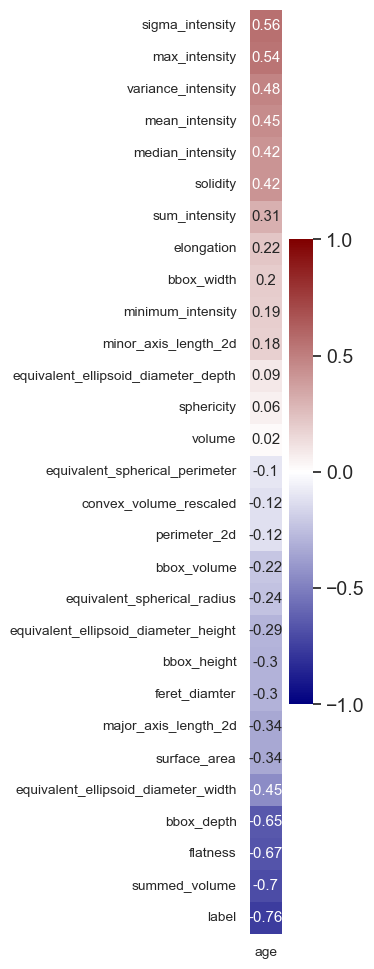

In [6]:
# Define figure size
plt.figure(figsize=(2, 12))

# Compute heatmap
heatmap = correlation_vector_age(measurements_cpfl, font_scale=0.9)

# Retrieve colorbar for adjustments
colorbar = heatmap.collections[0].colorbar

# Define ticks and fontsize for the colorbar
colorbar.ax.tick_params(labelsize=14)
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.savefig(save_path + "01-b-correlation-vector-age.png",
            dpi=300,
            bbox_inches="tight")